# WORD EMBEDDINGS 101

static word embeddings are numerical vector representations of words in an n-dimensional space

What are static and dynamic word embeddings?

Static embeddings represent each word with a single, fixed embedding vector. As you’ll see in Section 1.2, this can give some issues as a lot of words have more than one meaning.

In contrast, dynamic (or contextual) embeddings assign vectors that change depending on the surrounding sentence or document. That is, the representation of a word adapts to the context it is in!

1.1 Load a Pretrained Embedding Model

Start by installing the package gensim

Import pathlib and KeyedVectors from gensim.models

Load the pre-installed model GloVe


In [1]:
%pip install gensim

from pathlib import Path
from gensim.models import KeyedVectors

path = Path.cwd()
models_path = path.parents[1] / "resources" / "models" 

# note the str() as KeyedVectors.load() needs a string path !
model = KeyedVectors.load(str(models_path / "glove_wiki_gigaword_300.kv")) 

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 63.7 MB/s  0:00:006m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 72.2 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 105.2 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [gensim]2m4/5 [gensim]pen]
Note: you may need to restart the kernel to use updated packages.


1.2 Exploring polysemous words

Polysemy refers to words that have two or more meanings. There are many out there:

Bat (the flying mouse-like animal and the thing used in baseball)

Beat (the beat is the rythm of a song. To beat is to be violent)

Groove (a ridge or cleft in something, the rhythm of a funky song)

Leaves (might be leaves on a tree or someone leaving a place)

We can look at the most similar words (cosine similarity) for the word leaves in our model to illustrate this:

In [ ]:
model.most_similar("leaves", topn=15)



[('leaf', 0.5564894080162048),
 ('stems', 0.554435670375824),
 ('leaving', 0.5414506196975708),
 ('leave', 0.5339293479919434),
 ('ends', 0.526331901550293),
 ('flowers', 0.48853448033332825),
 ('stalks', 0.47854119539260864),
 ('grows', 0.47765129804611206),
 ('arrives', 0.4741629362106323),
 ('takes', 0.47301045060157776),
 ('foliage', 0.4626350700855255),
 ('turns', 0.4491370618343353),
 ('goes', 0.44434428215026855),
 ('becomes', 0.43927299976348877),
 ('comes', 0.43823492527008057)]

As a starting exercise, find a polysemous word like leaves or bat whose top-15 most similar words (by cosine similarity) reflect multiple meanings.

In [6]:
model.most_similar("dice", topn=15)

model.most_similar("swag", topn=15)

[('duffle', 0.3645368218421936),
 ('shuttlecocks', 0.35407784581184387),
 ('barf', 0.3537319302558899),
 ('freebie', 0.3528185486793518),
 ('doggie', 0.34290772676467896),
 ('tote', 0.342420369386673),
 ('swags', 0.3379136919975281),
 ('tinsel', 0.33471372723579407),
 ('flexi-disc', 0.33352595567703247),
 ('curtains', 0.32994887232780457),
 ('eft', 0.32959410548210144),
 ('faves', 0.32771456241607666),
 ('rhinestones', 0.3239775002002716),
 ('goodies', 0.32389307022094727),
 ('cellophane', 0.3236596882343292)]

In [26]:
model.most_similar("light", topn=15)

[('lights', 0.5719754695892334),
 ('bright', 0.5631998777389526),
 ('dark', 0.5300681591033936),
 ('sunlight', 0.5233156681060791),
 ('lighter', 0.5068577527999878),
 ('blue', 0.4855985641479492),
 ('heavy', 0.46853721141815186),
 ('ultraviolet', 0.45304983854293823),
 ('colored', 0.44439899921417236),
 ('shine', 0.44215908646583557),
 ('lighting', 0.4415198266506195),
 ('glow', 0.43947532773017883),
 ('illumination', 0.43754467368125916),
 ('color', 0.43374353647232056),
 ('visible', 0.4258178770542145)]

1.3 Synonyms and Antonyms

Let’s explore synonyms and antonyms with word embeddings. One approach is cosine distance, defined as 1 - cosine similarity.

The higher the distance, the farther apart two words are in vector space. This means that they should have less “in common”, but word embeddings are not always intuitive!

For example, an antonym for the word "happy" is the word "sad":

And a synonym for happy would becheerful:

Although happy and cheerful are synonyms, happy is actually closer to sad than to cheerful in terms of cosine distance! We can also check this programatically with the boolean operator <

With your knowledge about embeddings, can you explain why happy is closer to sad than cheerful? - happy probably co-occurs with sad or the same words as sad more often than cheerful because happy and sad would probably occur in documents with the same "lix" or lexical complexity

In [7]:
model.distance("happy","sad")

model.distance("happy","cheerful")

# if true, happy is closer to sad than to cheerful
model.distance("happy", "sad") < model.distance("happy","cheerful") 

True

TASK 1

Find three words (w1,w2,w3) where w1 and w2 are synonyms and w1 and w3 are antonyms, but where w1 is closer to its antonym w3 than to its synonym w2:

Cosine Distance(w1,w3) < Cosine Distance(w1,w2)

This is just what we did above!

TASK 2

Can you explain why your counter-intuitive example happens (with your knowledge about embeddings) ?

In [27]:
model.distance("light", "lightweight")

0.6624517738819122

In [28]:
model.distance("light", "heavy")

0.5314628183841705

In [29]:
model.distance("light","luminous")

0.6726333796977997

In [31]:
model.distance("light","dark")

0.46993178129196167

1.4 Exploring Word Analogies
An interesting feature of trained word embeddings is that we can discover analogies by doing basic arithmetic (addition/subtraction). That is, the embedding for queen can be approximated as:

queen = king - man + woman

Corresponding to the statement “man is to king as woman is to queen” (I recommend reading Allen (2019) for deeper insights).

In Python, we do this arithmetic with the method most_similar() using this (weird) syntax:

In [ ]:
# what is = king + woman - man
model.most_similar(positive=['king', 'woman'], 
                   negative=['man'])[0] # 0 to get only the closest word

('queen', 0.6713277101516724)

Your Turn: “Correct” & “Wrong” Analogies
Please do this task with a classmate or two! Experiment and discuss!

HANDS-ON

Use the .most_similar() function on your model and do the following tasks:

TASK A
Find “correct” analogies. By “correct,” I mean analogies where the closest vector corresponds to the word you expect (like the king–queen example). You should:

Try to find at least two analogies.

TASK B
Find “wrong” analogies. By “wrong,” I mean analogies that should work (like the king–queen example) but do not. You should:

Try to find at least one where the closest vector does not correspond to what you expect!

Consider why your analogies may not work!

TASK C
Share your best analogy (correct or wrong) on TaskCards. Remember to provide a short explanation!

In [ ]:
model.most_similar(positive=['man'], 
                   negative=['balls'])[0] # 0 to get only the closest word

('woman', 0.5048227906227112)

In [62]:
model.most_similar(positive=['woman'], 
                   negative=['tits'])[0] # 0 to get only the closest word

('man', 0.5385221838951111)

In [49]:
model.most_similar(positive=['junkie'], 
                   negative=['drugs'])[0] # 0 to get only the closest word

('newspaperman', 0.4105490446090698)

In [54]:
model.most_similar(positive=['fries'], 
                   negative=['potato'])[0] # 0 to get only the closest word

('cheeseburgers', 0.3650704622268677)

In [57]:
model.most_similar(positive=['burger','cheese'])[0] # 0 to get only the closest word

('sandwich', 0.6585514545440674)

In [61]:
model.most_similar(positive=['life','depression'])[0] # 0 to get only the closest word

('childhood', 0.5513194799423218)

1.5 Uncovering Bias
Due to the way embeddings are trained, they may contain some biases. While basic heuristics are fine, gender stereotypes can be problematic when applying these embeddings in the real world!

Let’s try: director - man + woman

Using some of the techniques you’ve worked on above, find at least one clear instance of bias in word embeddings.

In [63]:
print(model.most_similar(positive=["director", "woman"],
                          negative=['man']))

[('assistant', 0.4793030619621277), ('chairwoman', 0.4766245186328888), ('executive', 0.46431592106819153), ('susan', 0.4622037410736084), ('spokeswoman', 0.4561289846897125), ('associate', 0.4546034634113312), ('directors', 0.44585472345352173), ('actress', 0.4415530860424042), ('deputy', 0.42916232347488403), ('researcher', 0.41419851779937744)]


In [68]:
print(model.most_similar(positive=["musician","man"],
                          negative=['woman']))

[('guitarist', 0.6264199018478394), ('songwriter', 0.6201280951499939), ('composer', 0.6051713824272156), ('drummer', 0.5772380232810974), ('musicians', 0.5355761647224426), ('multi-instrumentalist', 0.5352658033370972), ('pianist', 0.5351281762123108), ('actor', 0.5213513374328613), ('guitar', 0.521259605884552), ('bassist', 0.5196665525436401)]


In [69]:
print(model.most_similar(positive=["musician","woman"],
                          negative=['man']))

[('singer', 0.6913306713104248), ('songwriter', 0.6714069843292236), ('singer-songwriter', 0.6016770601272583), ('actress', 0.5864976048469543), ('artist', 0.5796062350273132), ('pianist', 0.5745943784713745), ('vocalist', 0.5606374144554138), ('educator', 0.5569909811019897), ('violinist', 0.5471984148025513), ('dancer', 0.5469552278518677)]


1.6 Visualization
So far, we have looked at how words relate to each other with cosine scores. To get a better overview, we can also visualize these relationships!

Dimensionality reduction
Since embeddings usually have many more than 2 or 3 dimensions, we need to reduce their dimensionality in order to visualize them:

Various dimensionality reduction algorithms exist. Two useful ones for our case is Principal Component Analysis (PCA) and T-distributed Stochastic Neighbor Embedding (TSNE).

Start by installing scikit-learn:

Let’s import PCA & TSNE (we only need one now, but we’ll want to compare later!)

Choose a few words that we want to plot and extract embeddings from them:

Define your own list of words. Select a few more than 8!

Extract embeddings using a for loop (use my code for this!)

Transform the embeddings using both PCA and TSNE

For TSNE (see also hints below)

You need to convert embeddings to a numpy array before using TSNE

You need to set perplexity = 5 (you can experiment with the exact integer, but it has to be below the amount of words, see docs)

Plot both versions using the code snippet above.

Please share your words and either the PCA or TSNE plot on TaskCards

For an extra challenge, you can try to 1) make relevant functions for this pipeline and 2) make the plot prettier!


In [ ]:
#The packages we need

%pip install scikit-learn

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%pip install numpy
import numpy as np

%pip install matplotlib pandas seaborn

# best practice at top of notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
# word we want to plot
words = ["happy", "cheerful", "delighted", "joyous", "ecstatic", "sad", "depressed", "sorrowful","miserable","unhappy"]

# an empty list for embeddings
embeddings = []

# get vectors for subset of words
for word in words:
    embeddings.append(model[word]) # get the embedding vector for each word using our MODEL

We can now apply the PCA alg. to our embeddings for the chosen words. We write n_components = 2 to reduce dimensions to 2D:

And we'll also do TSNE Before using TSNE, we need to convert your list of embeddings into a numpy array first:

In [81]:
pca = PCA(n_components=2, random_state=50) # instantiate PCA object
embeddings_pc = pca.fit_transform(embeddings)

embeddings_tsne = np.array(embeddings) # To do tsne you need to convert embeddings to a numpy array

tsne = TSNE(n_components=2, random_state=42, perplexity=5) # Instantiate a TSNE object
embeddings_tsne = tsne.fit_transform(embeddings_tsne)

Plotting!
Now that we have reduced the dimensions of our embddings, let’s plot our shit

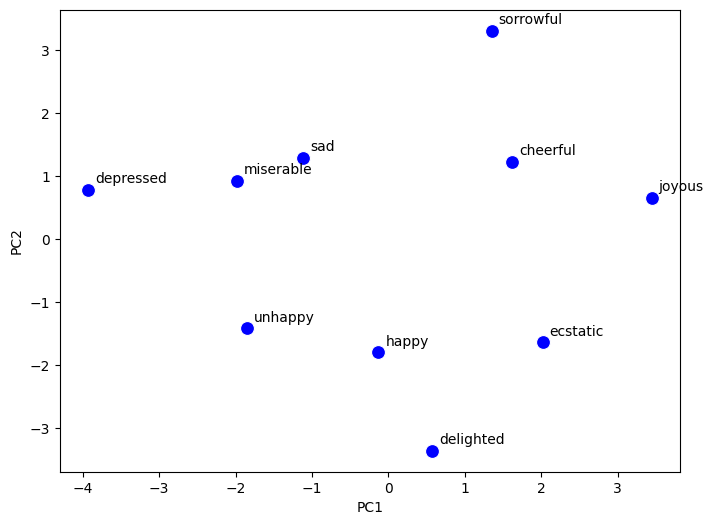

In [82]:
# convert to DF 
df_pc = pd.DataFrame(embeddings_pc, columns=["PC1", "PC2"]) # common PCA dims PC1 and PC2
df_pc["word"] = words

# create a scatter plot
plt.figure(figsize=(8, 6)) # width, height

sns.scatterplot(data=df_pc, 
                x="PC1", # first dim on x
                y="PC2", # second dim on y
                s=100, # size of points 
                color="blue", 
                )


# add words to points
for _, row in df_pc.iterrows():
    plt.annotate(
        row["word"],                     # text to display
        (row["PC1"], row["PC2"]),        # coordinates of the point being labeled
        xytext=(5, 5),                   # offset of the text from the point (in points)
        textcoords="offset points",      # interpret xytext in points relative to the point
        fontsize=10
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

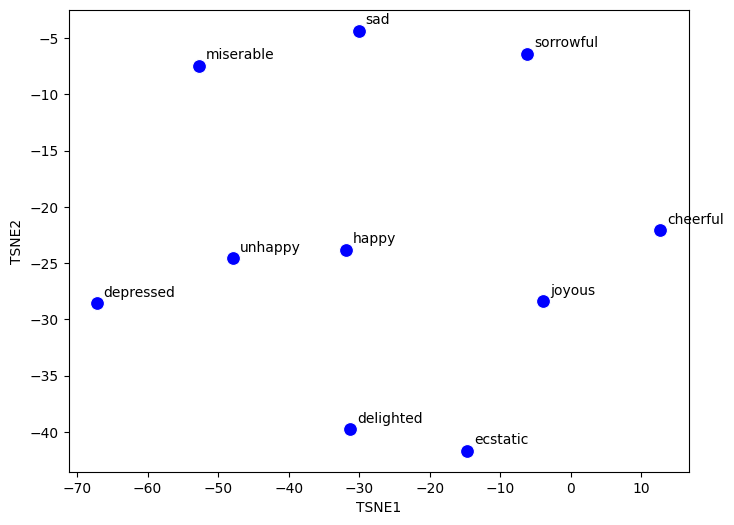

In [84]:
# convert to DF 
df_tsne = pd.DataFrame(embeddings_tsne, columns=["TSNE1", "TSNE2"]) # common TSNE dims PC1 and PC2
df_tsne["word"] = words

# create a scatter plot
plt.figure(figsize=(8, 6)) # width, height

sns.scatterplot(data=df_tsne, 
                x="TSNE1", # first dim on x
                y="TSNE2", # second dim on y
                s=100, # size of points 
                color="blue", 
                )


# add words to points
for _, row in df_tsne.iterrows():
    plt.annotate(
        row["word"],                     # text to display
        (row["TSNE1"], row["TSNE2"]),        # coordinates of the point being labeled
        xytext=(5, 5),                   # offset of the text from the point (in points)
        textcoords="offset points",      # interpret xytext in points relative to the point
        fontsize=10
    )

plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()